<a href="https://colab.research.google.com/github/princesse85/sentiment0/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # Moved the import of nltk to the top

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
!pip install contractions
import contractions
from nltk.tokenize import word_tokenize # Import word_tokenize



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train_dataset = pd.read_csv('/content/e commerce reviews train.csv')

In [8]:
test_dataset = pd.read_csv  ('/content/e commerce reviews test.csv')

In [9]:
# Sample review dataset (Replace with actual dataset)
data = {
    "review": [
        "I love this product! It's amazing.",
        "Terrible experience, I hate it!",
        "Great value for money. Highly recommend!",
        "Worst product ever. Waste of money.",
        "Absolutely fantastic! Works like a charm.",
        "I don't like it, not worth the price.",
        "Superb quality, very happy with it.",
        "Disappointed, not what I expected."
    ],
    "label": ["__label__2", "__label__1", "__label__2", "__label__1", "__label__2", "__label__1", "__label__2", "__label__1"]
}

In [10]:
# in mapping===>old value:new value
mapped_values = {
    "__label__1": "negative",
    "__label__2": "positive"
}


In [11]:
# Convert to DataFrame
df = pd.DataFrame(data)



In [12]:


#  Map Labels: "__label__1" → 0 (Negative), "__label__2" → 1 (Positive)
df['sentiment'] = df['label'].map({"__label__1": 0, "__label__2": 1})


In [13]:
train_dataset.head(10)

,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
5,__label__2,an absolute masterpiece: I am quite sure any o...
6,__label__1,"Buyer beware: This is a self-published book, a..."
7,__label__2,Glorious story: I loved Whisper of the wicked ...
8,__label__2,A FIVE STAR BOOK: I just finished reading Whis...
9,__label__2,Whispers of the Wicked Saints: This was a easy...


In [14]:
test_dataset.head(10)

,labels,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...
5,__label__1,DVD Player crapped out after one year: I also ...
6,__label__1,"Incorrect Disc: I love the style of this, but ..."
7,__label__1,DVD menu select problems: I cannot scroll thro...
8,__label__2,Unique Weird Orientalia from the 1930's: Exoti...
9,__label__1,"Not an ""ultimate guide"": Firstly,I enjoyed the..."


In [15]:
print(train_dataset.shape)
print(test_dataset.shape)

(3600010, 2)
(400000, 2)


In [16]:
#  Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [17]:
#  Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [18]:
#remove stopwords
#bag of words
#tfidf
from tqdm import tqdm
#
text ='this is an example with some stopwords, i love this product ,it is good'
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
#tokenize the split:split into list of words
words = nltk.word_tokenize(text)

words


['this',
 'is',
 'an',
 'example',
 'with',
 'some',
 'stopwords',
 ',',
 'i',
 'love',
 'this',
 'product',
 ',',
 'it',
 'is',
 'good']

In [20]:
filtered_words = [word for word in words if word not in stop_words]

In [21]:
filtered_words

['example', 'stopwords', ',', 'love', 'product', ',', 'good']

In [22]:
filtered_text = ' '.join(filtered_words)

In [23]:
filtered_text

'example stopwords , love product , good'

In [24]:
def remove_stopwords(text):

  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word not in stop_words]
  filtered_text = ' '.join(filtered_words)
  return filtered_text

In [25]:
# Initialize the list of stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(content):
    """
    Tokenize, convert text to lowercase and remove stops like this, is,to
    """
    # Convert text to lowercase and tokenize
    tokens = word_tokenize(content.lower())
    # Remove stopwords (and optionally punctuation or other unwanted tokens)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Reconstruct the text from the filtered tokens
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

In [26]:
train_dataset['text'].head(10)

,text
0,Stuning even for the non-gamer: This sound tra...
1,The best soundtrack ever to anything.: I'm rea...
2,Amazing!: This soundtrack is my favorite music...
3,Excellent Soundtrack: I truly like this soundt...
4,"Remember, Pull Your Jaw Off The Floor After He..."
5,an absolute masterpiece: I am quite sure any o...
6,"Buyer beware: This is a self-published book, a..."
7,Glorious story: I loved Whisper of the wicked ...
8,A FIVE STAR BOOK: I just finished reading Whis...
9,Whispers of the Wicked Saints: This was a easy...


In [27]:
## Remove Urls
def remove_urls(text):
    """
    Remove URLs.
    """
    # Replaces urls with a space
    return re.sub(r'http\S+|www\.\S+', '', text)


In [28]:
# Test Case for removing URLs
Test_case_for_removing_urls = "Check out https://www.example.com or visit www.example.org for more info!"
cleaned_text = remove_urls(Test_case_for_removing_urls)
print(cleaned_text)

Check out  or visit  for more info!


In [29]:
train_dataset

,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3600005,__label__1,Don't do it!!: The high chair looks great when...
3600006,__label__1,"Looks nice, low functionality: I have used thi..."
3600007,__label__1,"compact, but hard to clean: We have a small ho..."
3600008,__label__1,what is it saying?: not sure what this book is...


In [30]:
# Assuming these cells are run first to load the datasets
# python-input-4-9a0ef8909d35
from google.colab import drive
drive.mount('/content/drive')

# python-input-5-9a0ef8909d35
train_dataset = pd.read_csv('/content/e commerce reviews train.csv')

# ipython-input-6-9a0ef8909d35
test_dataset = pd.read_csv  ('/content/e commerce reviews test.csv')

# ... other cells ...

# python-input-3-9a0ef8909d35 (This cell should run AFTER the dataset loading cells)
# Install the contractions library
!pip install contractions

# Import necessary libraries
import contractions
import re

# Define the contraction expansion function
def contraction_expansion(text):
    """
    Expand contractions in the text.
    """
    # Expand contractions using the contractions library
    return contractions.fix(text)

#  Text Cleaning Function (updated to include contraction_expansion)
def clean_text(text):
    text = contraction_expansion(text) # Expand contractions
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
# This will now work because train_dataset and test_dataset are defined
train_dataset["text"] = train_dataset["text"].apply(clean_text)
test_dataset["text"] = test_dataset["text"].apply(clean_text)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
## Mapping the labels 1 and label 2 with Negative and Positive
mapping_dict = {
    '__label__1' : 'negative',
    '__label__2'	: 'positive'
}

train_dataset['labels'] = train_dataset['labels'].map(mapping_dict)
test_dataset['labels'] = test_dataset['labels'].map(mapping_dict)

In [32]:
train_dataset.head()

,labels,text
0,positive,stuning even for the non gamer this sound trac...
1,positive,the best soundtrack ever to anything i am read...
2,positive,amazing this soundtrack is my favorite music o...
3,positive,excellent soundtrack i truly like this soundtr...
4,positive,remember pull your jaw off the floor after hea...


In [33]:
# checking the value counts for both positive and negative in each dataset
print(train_dataset['labels'].value_counts())
print(test_dataset['labels'].value_counts())

labels
positive    1800009
negative    1800001
Name: count, dtype: int64
labels
positive    200000
negative    200000
Name: count, dtype: int64


In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Assuming the file path is correct and the drive is mounted
train_dataset = pd.read_csv('/content/e commerce reviews train.csv')
train_df, val_df = train_test_split(
    train_dataset,
    test_size=0.2,             # 20% of the data for validation
    random_state=42,           # for reproducibility
    stratify=train_dataset["labels"]  # preserve label distribution
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
print(train_df.shape, val_df.shape)


(2880008, 2) (720002, 2)


In [36]:
print(train_dataset.columns)
print(train_dataset["labels"].value_counts())


Index(['labels', 'text'], dtype='object')
labels
__label__2    1800009
__label__1    1800001
Name: count, dtype: int64


In [37]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Assuming the file path is correct and the drive is mounted
train_dataset = pd.read_csv('/content/e commerce reviews train.csv')
test_dataset = pd.read_csv  ('/content/e commerce reviews test.csv')

# Make sure this line is executed

# The following code from ipython-input-6 can then run
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(
    train_dataset,
    test_size=0.2,             # 20% of the data for validation
    random_state=42,           # for reproducibility
    stratify=train_dataset["labels"]  # preserve label distribution
)

# The code from ipython-input-11 can then run without the NameError
X_train = train_df["text"]
y_train = train_df["labels"]

X_val = val_df["text"]
y_val = val_df["labels"]

X_test = test_dataset["text"] # This line will now work
y_test = test_dataset["labels"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
print(X_train.head())
print(y_train.value_counts())


1393847    Cover roll bandage: Cover-Roll Stretch 2 Inche...
1927285    OMG - soooooo bad: Don't waste your money! Ser...
279066     Check facts: I was doing ok with the book. Not...
964679     Author's Comments: I wrote this book some 25 y...
251214     Lost In Space: Watching an old episode of Lost...
Name: text, dtype: object
labels
__label__2    1440007
__label__1    1440001
Name: count, dtype: int64


In [39]:
print(X_train.head())
print(X_train.dtype)
print(X_train.isnull().sum())


1393847    Cover roll bandage: Cover-Roll Stretch 2 Inche...
1927285    OMG - soooooo bad: Don't waste your money! Ser...
279066     Check facts: I was doing ok with the book. Not...
964679     Author's Comments: I wrote this book some 25 y...
251214     Lost In Space: Watching an old episode of Lost...
Name: text, dtype: object
object
0


In [40]:
print(train_df.columns)
print(test_dataset.columns)


Index(['labels', 'text'], dtype='object')
Index(['labels', 'text'], dtype='object')


In [41]:
X_train = train_df["text"].fillna("")
X_val = val_df["text"].fillna("")
X_test = test_dataset["text"].fillna("")


In [42]:
print(X_train.head())
print(X_val.head())
print(X_test.head())


1393847    Cover roll bandage: Cover-Roll Stretch 2 Inche...
1927285    OMG - soooooo bad: Don't waste your money! Ser...
279066     Check facts: I was doing ok with the book. Not...
964679     Author's Comments: I wrote this book some 25 y...
251214     Lost In Space: Watching an old episode of Lost...
Name: text, dtype: object
3168358    Always love her books: Love Nora Roberts. She ...
1087425    BMW Oil Change: I switched from various synthe...
3402046    easy to use: After figuring out how to sync th...
1804275    An American Girl Mystery: TITLE OF BOOK: Saman...
662607     The BEST: When I first saw it, I immediately k...
Name: text, dtype: object
0    Great CD: My lovely Pat has one of the GREAT v...
1    One of the best game music soundtracks - for a...
2    Batteries died within a year ...: I bought thi...
3    works fine, but Maha Energy is better: Check o...
4    Great for the non-audiophile: Reviewed quite a...
Name: text, dtype: object


In [43]:
print(type(X_train))              # Doit être Series
print(X_train.apply(type).value_counts())  # Toutes les entrées doivent être str


<class 'pandas.core.series.Series'>
text
<class 'str'>    2880008
Name: count, dtype: int64


In [44]:
X_train = X_train.astype(str)
X_val = X_val.astype(str)
X_test = X_test.astype(str)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 1),
    stop_words='english'
)


In [46]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)


In [47]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# 1️⃣ Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)
log_acc = accuracy_score(y_test, y_pred_log)

NameError: name 'X_train_tfidf' is not defined

In [49]:
# 2️⃣ Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, y_pred_nb)


In [ ]:
# 3️⃣ Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
svm_acc = accuracy_score(y_test, y_pred_svm)

In [ ]:
# 🔹 Print Evaluation Metrics
print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print(f"Naïve Bayes Accuracy: {nb_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")

print("\n🔹 Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.00
Naïve Bayes Accuracy: 0.00
SVM Accuracy: 0.00

🔹 Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
#  Select Best Model for Confusion Matrix
best_model = "SVM" if svm_acc >= max(log_acc, nb_acc) else "Logistic Regression" if log_acc >= nb_acc else "Naïve Bayes"
best_pred = y_pred_svm if best_model == "SVM" else y_pred_log if best_model == "Logistic Regression" else y_pred_nb



In [12]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

NameError: name 'tfidf' is not defined

In [14]:
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

with open("sentiment_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)

# Quick test
sample_text = ["This product is amazing!"]
sample_vector = tfidf_loaded.transform(sample_text)
sample_prediction = model_loaded.predict(sample_vector)
print(sample_prediction)

EOFError: Ran out of input

In [17]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Charger les données
df = pd.read_csv("e commerce reviews test.csv")


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisation
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modèle
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Sauvegarder modèle et vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Modèle et vectorizer sauvegardés avec succès.")


✅ Modèle et vectorizer sauvegardés avec succès.


In [16]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Charger les données
# Assuming the file path is correct
df = pd.read_csv("e commerce reviews test.csv")

# Use the 'text' column for features (X) and 'labels' for the target (y)
# These are the column names likely present in the CSV file
X = df['text']
y = df['labels']

# Split (although typically you don't split the test set for training)
# If the goal is to evaluate on a subset of this data, this is fine.
# If the goal is to prepare the entire test set for prediction, splitting isn't necessary here.
X_train, X_test_split, y_train, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisation (using a new vectorizer here, which might not be desired if you want to use the saved one)
# If you want to use the saved vectorizer, load it instead of fitting a new one.
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test_split) # Transform the split test data

# Modèle (training a new model here, which is likely not desired if you want to use the saved one)
# If you want to use the saved model, load it instead of training a new one.
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Sauvegarder modèle et vectorizer (This will overwrite the previously saved files)
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Modèle et vectorizer sauvegardés avec succès.")

✅ Modèle et vectorizer sauvegardés avec succès.


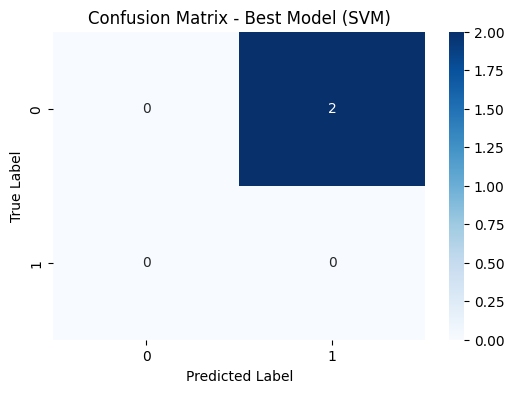

In [ ]:
#  Plot Confusion Matrix for Best Model
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - Best Model ({best_model})")
plt.show()

In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    # Get polarity scores using VADER
    scores = sia.polarity_scores(text)
    # Classify as positive or negative based on compound score
    if scores['compound'] >= 0.05:
        return 1  # Positive
    else:
        return 0  # Negative
        print(f"The sentiment is {sentiment} (Compound Score: {compound_score})")








[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#getting the sentiment scores
# Initialize sentiment_scores with an example text
example_text = "This is an example sentence."  # Replace with your desired text
sentiment_scores = sia.polarity_scores(example_text)

compound_score = sentiment_scores['compound']
#now lets make a decision for the cut off for a postitive or negative score
if compound_score > 0:
    sentiment = "Positive"
else:
  sentiment = "Negative"

print(f"The sentiment is {sentiment} (Compound Score: {compound_score})")

The sentiment is Positive (Compound Score: 0.0772)


In [ ]:
##we want to apply all we just did to all the text in our dataset, so lets first
##create the function, then we apply the function

def analyze_sentence(sentence, threshold = 0):
  sentiment_scores = analyzer.polarity_scores(sentence)
  compound_score = sentiment_scores['compound']

  if compound_score > threshold:
    sentiment = "positive"
  else:
    sentiment = "negative"

  return sentiment

In [ ]:
total_rows = len(test_dataset)
tqdm.pandas(total=total_rows)

In [ ]:
total_rows = len(train_dataset)
tqdm.pandas(total=total_rows)
# Replacing 'get_stopwords' with 'remove_stopwords' to use the defined function
train_dataset['stop words']= train_dataset['text'].progress_apply(remove_stopwords)

100%|██████████| 3600010/3600010 [42:52<00:00, 1399.35it/s]


In [ ]:
train_dataset

,labels,text,stop words
0,__label__2,Stuning even for the non-gamer: This sound tra...,Stuning even non-gamer : This sound track beau...
1,__label__2,The best soundtrack ever to anything.: I'm rea...,The best soundtrack ever anything . : I 'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...,Amazing ! : This soundtrack favorite music tim...
3,__label__2,Excellent Soundtrack: I truly like this soundt...,Excellent Soundtrack : I truly like soundtrack...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He...","Remember , Pull Your Jaw Off The Floor After H..."
...,...,...,...
3600005,__label__1,Don't do it!!: The high chair looks great when...,Do n't ! ! : The high chair looks great first ...
3600006,__label__1,"Looks nice, low functionality: I have used thi...","Looks nice , low functionality : I used highch..."
3600007,__label__1,"compact, but hard to clean: We have a small ho...","compact , hard clean : We small house , really..."
3600008,__label__1,what is it saying?: not sure what this book is...,saying ? : sure book supposed . It really reha...


In [ ]:
# Add the 'stop words' column to test_dataset using the same method as train_dataset
 # Calculate total rows for test_dataset
total_rows = len(test_dataset)
tqdm.pandas(total=total_rows)
# Apply remove_stopwords to test_datase
test_dataset['stop words'] = test_dataset['text'].progress_apply(remove_stopwords)



100%|██████████| 400000/400000 [04:44<00:00, 1406.86it/s]


In [ ]:
# Apply VADER sentiment analysis to the 'text' column and store results in 'vader_on_text'
test_dataset['vader_on_text'] = test_dataset['text'].apply(get_vader_sentiment)




In [ ]:
def evaluate(model, dataloader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

In [ ]:
!pip install transformers datasets





[NbConvertApp] WARNING | pattern 'KDDCup.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec